This notebook simply runs the simulation and calculates power in different ways.
It is in order of the images in the overleaf draft: 
1. No Power Loss (vertical, single ray, center angle: Function RunOneRay_nopix given wavelength, number of mirror positions, and source point in global coordinates)
2. Chamberlain Loss (All rays interfering at the detector: Function RunRays_Prob_narrow given wavelength, number of mirror positions, source point in global coordinates, and solid angle in radians)
3. Geometric Loss (Each launched ray interfering only with itself: Function RunNRays_NoPix given wavelength, number of mirror positions, source point in global coordinates, and number of rays to be run (default 500 for all))).

Lastly there is a sequence that can be used to save each step of a ray through the simulation. (tried with pickle, but resulting file was too large)

Mira Liu 08/14/2019

In [8]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import * 
from random import uniform
import random
import pickle
import math
import time

# No Power Loss: 
## Vertical Launch, Single Ray, randomly selected initial polarization. 
### (Eq. 7 in overleaf draft)

began:  2019-07-03 20:18:52
CURRENTLY RUNNING...
COMPLETED
total time: ~ 0.9982211510340373 mins


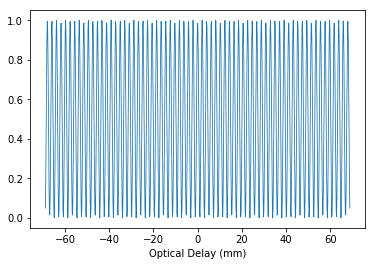

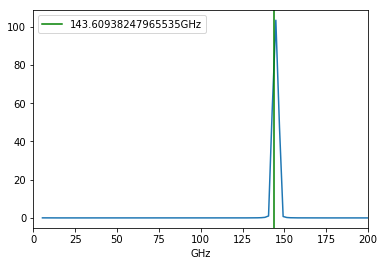

In [9]:
Timei = time.time()
Lamd = 2.089
Nsize = Nsized(Lamd)
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED, SOURCE POINT OF LAUNCHED RAY
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')    
Delay_1Center,Ij_1Center = RunOneRay_nopix(Lamd,Nsize,spo)

# can save output interferogram as pickle file if wanted
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')


d1 = Ij_1Center
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay_1Center,Ij_1Center,linewidth = .8) 
pl.tick_params(colors = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show() 
pl.plot(300*f[3:],u[3:])
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
pl.show()

# Chamberlain loss: 
## 500 rays, solid angle half angle 20 degrees (in radians pi/18), initial polarization of 0, initial phase of 0, all 500 launched rays interfere with each other. 
### (Eq. 8 in Overleaf draft)

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')
Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

Delay1, Ij1 = RunRays_Prob_narrow(Lamd,Nsize,spo,np.pi/9)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

# can save output interferogram as pickle file if wanted
#with open("Ij_Chamb_144_Narrow_10_-161.375_"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    #pickle.dump(Ij1,F)
#with open("Delay_Chamb_144_Narrow_10_-161.375_"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    #pickle.dump(Delay1,F)

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show() 

pl.plot(300*f[3:],u[3:])
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
pl.show()

# Geometric Loss: 
## 500 rays, Solid angle ~ 20 (selected from specular distribution if it hits the first mirror), random initial polarization, each ray only interferes with itself. 
### (Eq. 9 in overleaf draft)

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
Lamd = 2.089
Nsize = Nsized(Lamd)
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
thetG = [0,0,0]
print('CURRENTLY RUNNING...')
Delay,Ij,Num = RunNRays_NoPix(Lamd,Nsize,spo,500) # Num is number of output rays as function of mirror position

# can save output as pickle 
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)

Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

d1 = Ij
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay,Ij,linewidth = .8) 
pl.tick_params(colors = 'black')
pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show() 
pl.plot(300*f[3:],u[2:])
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.legend()
pl.show()

# SAVE SIMULATION: 
## runs the simulation with n rays, of wavelength lamd, with Nsize sample points (mirror positions from -18 to 18) a sourcepointorigin at spo. Returns a single array of all of the rays generated at every instance. 

### It does nothing with power.

Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')
Lamd = 2.089
Nsize = Nsized(Lamd) #number of mirror positions
#Nsize=10
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
n=500  #number of rays 
Rays = RunRays_ToPickle(Lamd,Nsize,spo,n)

Timef = time.time()
print('COMPLETED')
print('finished: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timef)))
print('total time: ~',float(Timef-Timei)/60, 'mins')


print(Rays[0]) # should show all info of the path of the first launched ray